In [1]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import missingno
import matplotlib.patches as pathches
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset
churn_data=pd.read_csv(r"C:\Users\User\Desktop\Churn Prediction\churn_data.csv",index_col='user')

In [3]:
#check data colummns info
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 55409 to 52752
Data columns (total 30 columns):
churn                      27000 non-null int64
age                        26996 non-null float64
housing                    27000 non-null object
credit_score               18969 non-null float64
deposits                   27000 non-null int64
withdrawal                 27000 non-null int64
purchases_partners         27000 non-null int64
purchases                  27000 non-null int64
cc_taken                   27000 non-null int64
cc_recommended             27000 non-null int64
cc_disliked                27000 non-null int64
cc_liked                   27000 non-null int64
cc_application_begin       27000 non-null int64
app_downloaded             27000 non-null int64
web_user                   27000 non-null int64
app_web_user               27000 non-null int64
ios_user                   27000 non-null int64
android_user               27000 non-null int64
registered_phones 

In [4]:
#check dataframe
pd.set_option('display.max_columns',30)
churn_data.head(10)

,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
user,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0
3120,1,32.0,R,567.0,5,3,111,5,0,227,0,0,17,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Taurus,0,0,55.0,1.83,0
41406,0,21.0,na,475.0,0,0,4,0,0,0,0,0,0,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Cancer,0,0,2.0,0.07,0
67679,0,24.0,na,NaN,0,0,2,0,0,0,0,0,0,1,0,0,0,1,0,na,0,0,0,0,Leo,0,0,1.0,0.11,0
21269,0,28.0,R,548.0,0,0,0,0,2,47,1,0,9,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Sagittarius,0,0,26.0,0.87,1


In [5]:
#we infer that the columns age, credit_score and rewards_earned contain null values as can be seen in the count row.
churn_data.describe()

,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,0.050630,0.013111,8.197852,0.952481,0.606074,0.561741,0.393926,0.587259,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,0.871366,0.238158,12.497243,0.212749,0.488628,0.496183,0.488628,0.492336,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [6]:
#describe categorical data
churn_data.describe(include=object)

,housing,payment_type,zodiac_sign
count,27000,27000,27000
unique,3,5,13
top,na,Bi-Weekly,Cancer
freq,13860,12716,2424


In [7]:
#check columns individually for na data
churn_data['housing'].value_counts()

na    13860
R     10969
O      2171
Name: housing, dtype: int64

In [8]:
churn_data['payment_type'].value_counts()

Bi-Weekly       12716
Weekly           5289
na               3899
Monthly          2656
Semi-Monthly     2440
Name: payment_type, dtype: int64

In [9]:
churn_data['zodiac_sign'].value_counts()

Cancer         2424
Virgo          2410
Leo            2374
Taurus         2236
Gemini         2168
na             2159
Libra          2128
Pisces         2127
Scorpio        2118
Aquarius       2117
Sagittarius    2056
Aries          2001
Capricorn       682
Name: zodiac_sign, dtype: int64

# Data Cleaning

In [10]:
#We can observe that there are null values in above columns in the form of 'na'.
#Let us convert it in the standardized format, by replacing "na" with NaN.
churn_data[["housing","payment_type","zodiac_sign"]]=(churn_data[["housing","payment_type","zodiac_sign"]]
                                                      .replace('na',np.NaN,regex=True))

In [11]:
#check again for null values
print(churn_data.isna().sum())

churn                          0
age                            4
housing                    13860
credit_score                8031
deposits                       0
withdrawal                     0
purchases_partners             0
purchases                      0
cc_taken                       0
cc_recommended                 0
cc_disliked                    0
cc_liked                       0
cc_application_begin           0
app_downloaded                 0
web_user                       0
app_web_user                   0
ios_user                       0
android_user                   0
registered_phones              0
payment_type                3899
waiting_4_loan                 0
cancelled_loan                 0
received_loan                  0
rejected_loan                  0
zodiac_sign                 2159
left_for_two_month_plus        0
left_for_one_month             0
rewards_earned              3227
reward_rate                    0
is_referred                    0
dtype: int

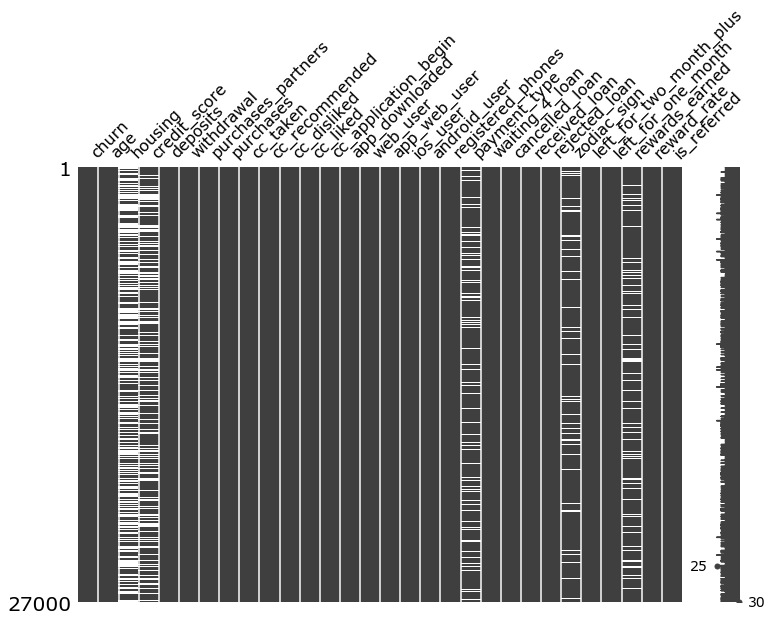

In [12]:
#matrix for quickly identifying nulls
missingno.matrix(churn_data,figsize=(12,8))

In [13]:
#We can get a clear picture from above that the columns which have white spaces in it contain null values.
#For numerical cols , we use 'mean' value for imputation.
churn_data[['age','credit_score','rewards_earned']]=(churn_data[['age','credit_score','rewards_earned']]
                                                     .fillna(churn_data[['age','credit_score','rewards_earned']].mean()))


In [14]:
#For categorical cols, we can replace by 'mode'.
churn_data[['housing','payment_type','zodiac_sign']]=(churn_data[['housing','payment_type','zodiac_sign']]
                                                          .fillna(churn_data[['housing','payment_type','zodiac_sign']]
                                                                  .mode().iloc[0]))

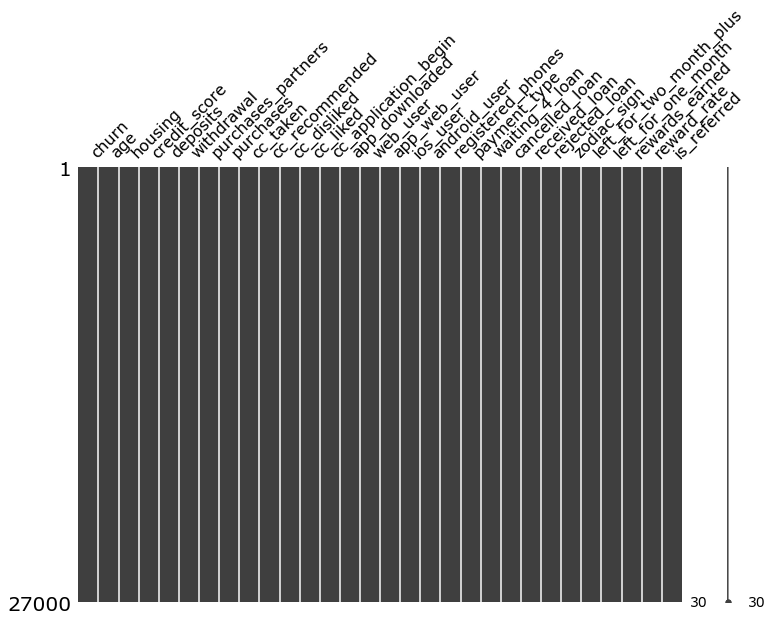

In [15]:
#No Nas-GOOD to GO
missingno.matrix(churn_data,figsize=(12,8))

In [16]:
#drop zodiac sign, as we think it's irrelevant with the target variable
churn_data=churn_data.drop('zodiac_sign',axis=1)

# Outlier Detection

In [17]:
#Get Only the continuous data and store it in numeric dataframe
numeric_data=(churn_data[['age','credit_score','deposits','withdrawal','purchases_partners','purchases','cc_taken',
                          'cc_recommended','cc_disliked','cc_liked','cc_application_begin','rewards_earned','reward_rate']])

In [18]:
#check new dataframe
numeric_data

,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,rewards_earned,reward_rate
user,,,,,,,,,,,,,
55409,37.0,542.944225,0,0,0,0,0,0,0,0,0,29.110125,0.00
23547,28.0,486.000000,0,0,1,0,0,96,0,0,5,44.000000,1.47
58313,35.0,561.000000,47,2,86,47,0,285,0,0,9,65.000000,2.17
8095,26.0,567.000000,26,3,38,25,0,74,0,0,26,33.000000,1.10
61353,27.0,542.944225,0,0,2,0,0,0,0,0,0,1.000000,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24291,24.0,580.000000,0,0,0,0,0,81,0,0,2,32.000000,1.07
4116,26.0,542.944225,0,0,2,0,0,1,0,0,0,2.000000,0.67
23740,22.0,542.944225,0,0,37,0,0,98,0,0,0,28.000000,0.93


In [19]:
#Identify outliers based on interquantile range
total_outliers=0
for i in numeric_data:
    q75,q25=np.percentile(churn_data.loc[:,i],[75,25])
    iqr=q75-q25
    minn=q25-(iqr*1.5)
    maxx=q75+(iqr*1.5)
    print("Column: ", i)
    print("Min Value: ", minn)
    print("Max Value: ", maxx)
    print("Outliers in {var} : {x}".format(var=i,x=(churn_data.loc[churn_data.loc[:,i]<minn,i].count() 
                                                    + churn_data.loc[churn_data.loc[:,i]>maxx,i].count())))
    
    print(" ")
print("Percentage of Outliers:" , total_outliers/27000)

Column:  age
Min Value:  7.0
Max Value:  55.0
Outliers in age : 838
 
Column:  credit_score
Min Value:  462.0
Max Value:  622.0
Outliers in credit_score : 3203
 
Column:  deposits
Min Value:  -1.5
Max Value:  2.5
Outliers in deposits : 5298
 
Column:  withdrawal
Min Value:  0.0
Max Value:  0.0
Outliers in withdrawal : 4005
 
Column:  purchases_partners
Min Value:  -64.5
Max Value:  107.5
Outliers in purchases_partners : 1391
 
Column:  purchases
Min Value:  -1.5
Max Value:  2.5
Outliers in purchases : 5258
 
Column:  cc_taken
Min Value:  0.0
Max Value:  0.0
Outliers in cc_taken : 1295
 
Column:  cc_recommended
Min Value:  -221.0
Max Value:  395.0
Outliers in cc_recommended : 1
 
Column:  cc_disliked
Min Value:  0.0
Max Value:  0.0
Outliers in cc_disliked : 556
 
Column:  cc_liked
Min Value:  0.0
Max Value:  0.0
Outliers in cc_liked : 230
 
Column:  cc_application_begin
Min Value:  -16.5
Max Value:  27.5
Outliers in cc_application_begin : 1713
 
Column:  rewards_earned
Min Value:  -40.0

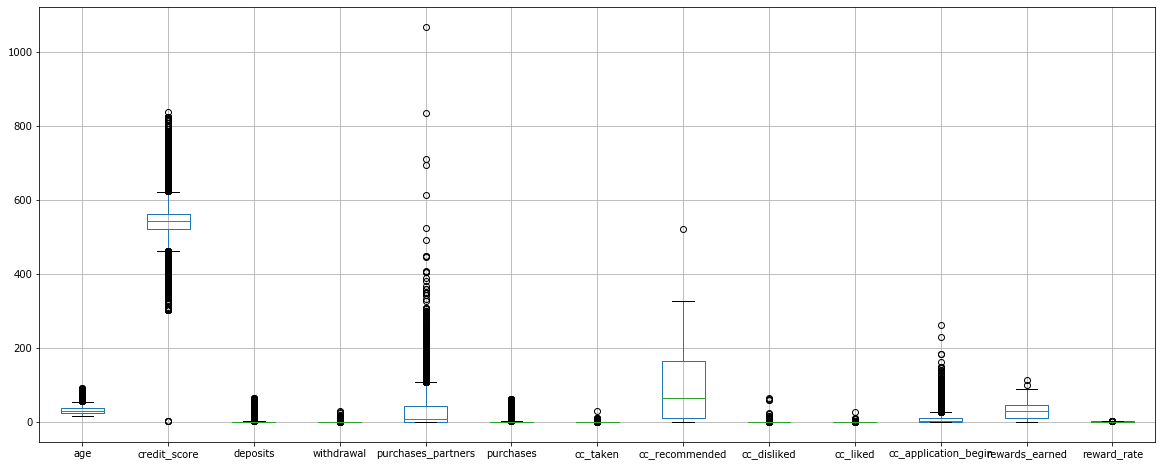

In [20]:
#create boxplots for outlier detection graphically
numeric_data.boxplot(return_type='axes',figsize=(20,8))

The box plot analysis shows many are outliers but in banking it's a natural phenomenon to observe some outliers. 
We term them as business outliers and let them be.

# Exploratory Data Analysis(EDA)

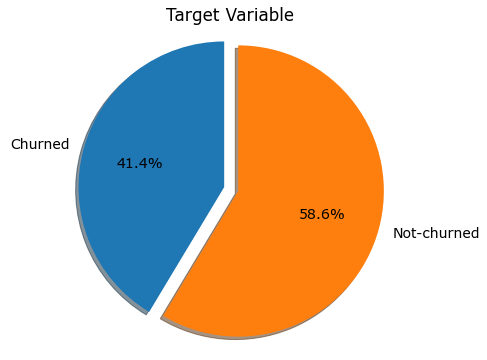

In [21]:
# Visualize Target Variable using Pie-Chart
labels = 'Churned','Not-churned' 
sizes=[churn_data[churn_data['churn']==1]['churn'].count(),churn_data[churn_data['churn']==0]['churn'].count()]
explode = (0, 0.1) 
fig, ax = plt.subplots(figsize=(8,6)) 
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize':14}) 
ax.axis('equal') 
plt.title("Target Variable",size=17) 
plt.show() 


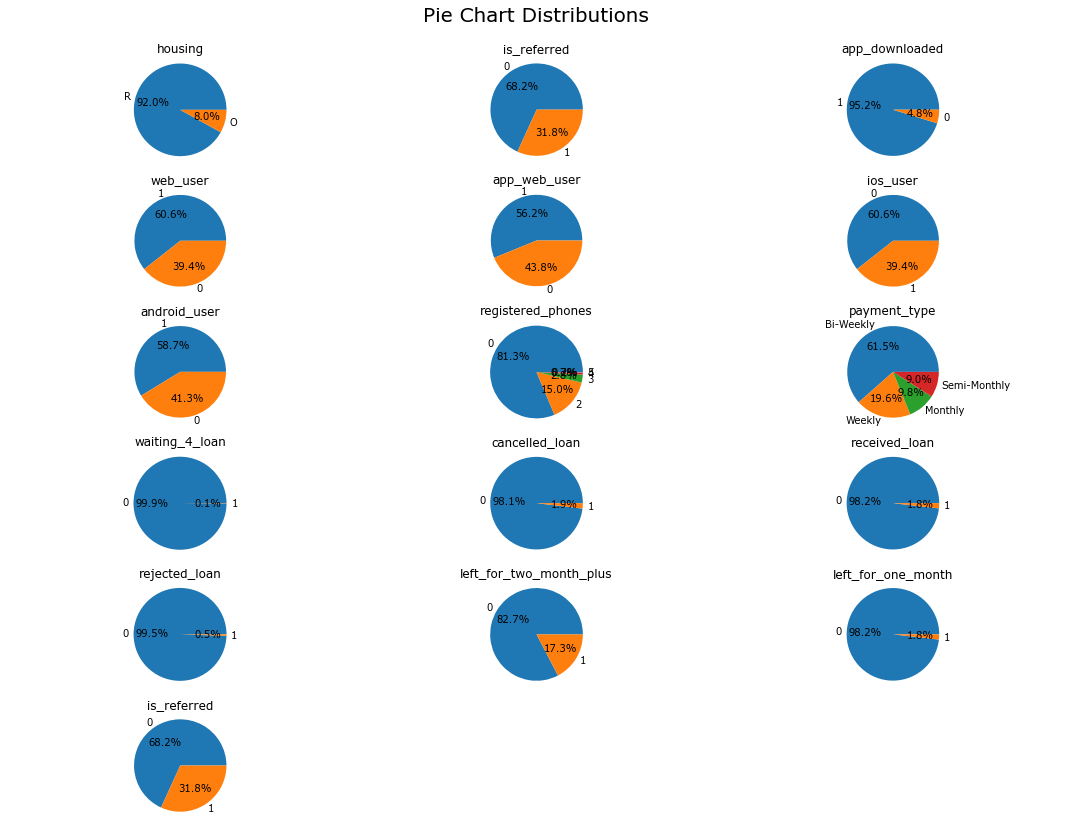

In [22]:
## Create Pie Plots for categorical variables VS Target-Variable
dataset2 = churn_data[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


Next we will explore uneven categorical features in our dataftrame. It is essential for those features that present 
very low percentage on one category, to **contain both values of our response variable in order to be included in the model, 
otherwise it could ruin the model by inserting bias.**
e.g if left_for_one_month=1 had only churners that variable would bias our result.

In [23]:
churn_data[churn_data.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [24]:
churn_data[churn_data.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [25]:
churn_data[churn_data.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [26]:
churn_data[churn_data.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [27]:
churn_data[churn_data.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

In [28]:
# We are good to go. More feature engineering, we proceed labeling.

In [29]:
churn_data['cc_recommended'].value_counts()

0      3767
5       757
1       440
10      401
6       338
       ... 
522       1
324       1
316       1
322       1
318       1
Name: cc_recommended, Length: 325, dtype: int64

In [30]:
#We will reform the cc_recommended variable, and we will divide the customers into two categories
#Recommended or Non-Recommended. The same procedure we will follow with the other variables presented below.

In [31]:
recomm_freq=800
cc_recomm=dict(zip(*np.unique(churn_data['cc_recommended'], return_counts=True)))
churn_data['cc_recommended']=churn_data['cc_recommended'].apply(lambda x: 'Recommended' if cc_recomm[x]<
recomm_freq else 'Not-recommended' )

In [32]:
churn_data['cc_recommended'].value_counts()

Recommended        23233
Not-recommended     3767
Name: cc_recommended, dtype: int64

In [33]:
churn_data['registered_phones'].value_counts()

0    21960
2     4048
3      754
4      183
5       55
Name: registered_phones, dtype: int64

In [34]:
recomm_freq=5000
cc_recomm=dict(zip(*np.unique(churn_data['registered_phones'], return_counts=True)))
churn_data['registered_phones']=churn_data['registered_phones'].apply(lambda x: 'Registered' if cc_recomm[x]<
recomm_freq else 'Not-registered')

In [35]:
churn_data['registered_phones'].value_counts()

Not-registered    21960
Registered         5040
Name: registered_phones, dtype: int64

In [36]:
churn_data['cc_taken'].value_counts()

0     25705
1       923
2       218
3        75
4        45
5        16
6        11
10        2
7         2
29        1
11        1
8         1
Name: cc_taken, dtype: int64

In [37]:
recomm_freq=1000
cc_recomm=dict(zip(*np.unique(churn_data['cc_taken'], return_counts=True)))
churn_data['cc_taken']=churn_data['cc_taken'].apply(lambda x: 'Taken' if cc_recomm[x]<
recomm_freq else 'Not-taken' )

In [38]:
churn_data['cc_taken'].value_counts()

Not-taken    25705
Taken         1295
Name: cc_taken, dtype: int64

In [39]:
#Converting the categorical features to 'object' data type
cat_cols =['housing','cc_taken','cc_recommended',
'app_downloaded','web_user','app_web_user',
'ios_user','android_user','registered_phones','payment_type','waiting_4_loan',
'cancelled_loan','received_loan','rejected_loan','left_for_two_month_plus',
'left_for_one_month','is_referred']
churn_data[cat_cols]=churn_data[cat_cols].astype('object')

In [40]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 55409 to 52752
Data columns (total 29 columns):
churn                      27000 non-null int64
age                        27000 non-null float64
housing                    27000 non-null object
credit_score               27000 non-null float64
deposits                   27000 non-null int64
withdrawal                 27000 non-null int64
purchases_partners         27000 non-null int64
purchases                  27000 non-null int64
cc_taken                   27000 non-null object
cc_recommended             27000 non-null object
cc_disliked                27000 non-null int64
cc_liked                   27000 non-null int64
cc_application_begin       27000 non-null int64
app_downloaded             27000 non-null object
web_user                   27000 non-null object
app_web_user               27000 non-null object
ios_user                   27000 non-null object
android_user               27000 non-null object
registered_

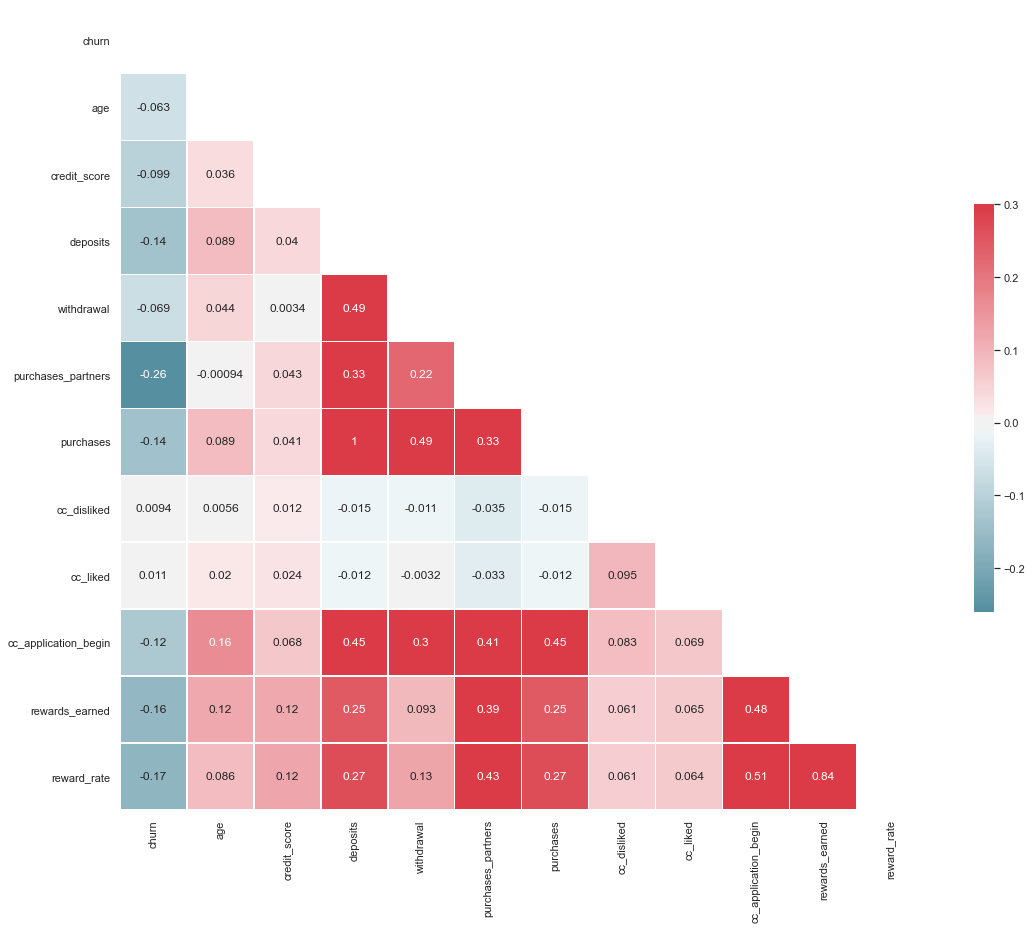

In [41]:
## Correlation Matrix Plot 
sns.set(style="white")

# Compute the correlation matrix for variables except the response- We try to identify dependence between independent variables
#which violates model's assumptions
corr = churn_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5})


In [42]:
## Note: Although there are somewhat correlated fields, they are not colinear
## These feature are not functions of each other, so they won't break the model
## But these feature won't help much either. Feature Selection should remove them.

# Removing Correlated Fields-because app_web_user is always 1 when columns app_download AND web_user are 1,
# so it's a function of these 2 thus it's not independent
churn_data = churn_data.drop(columns = ['app_web_user'])

In [43]:
#Moreover we can observe that purchases and deposits are correlated with the value 1, 
#e.g there is multicollinearity and one of them must be removed so we removed purchases
churn_data = churn_data.drop(columns = ['purchases'])

In [44]:
# Last but not least, we can see that reward_rate and rewart _earned are highly correlated so we wil create a new metric
#Rewards_Ratio = Rewards_earned / Reward_Rate and remove the other columns.
churn_data['rewards_ratio']=churn_data['rewards_earned']/(churn_data['reward_rate'])
churn_data['rewards_ratio'].replace(np.inf, 0, inplace=True)
churn_data = churn_data.drop(columns = ['rewards_earned','reward_rate'])

In [45]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 55409 to 52752
Data columns (total 26 columns):
churn                      27000 non-null int64
age                        27000 non-null float64
housing                    27000 non-null object
credit_score               27000 non-null float64
deposits                   27000 non-null int64
withdrawal                 27000 non-null int64
purchases_partners         27000 non-null int64
cc_taken                   27000 non-null object
cc_recommended             27000 non-null object
cc_disliked                27000 non-null int64
cc_liked                   27000 non-null int64
cc_application_begin       27000 non-null int64
app_downloaded             27000 non-null object
web_user                   27000 non-null object
ios_user                   27000 non-null object
android_user               27000 non-null object
registered_phones          27000 non-null object
payment_type               27000 non-null object
waiting_4_

In [46]:
#Here we present the correlation between our target variable and continous variables
churn_data.corr().churn

churn                   1.000000
age                    -0.063202
credit_score           -0.098639
deposits               -0.135327
withdrawal             -0.068503
purchases_partners     -0.260679
cc_disliked             0.009430
cc_liked                0.010893
cc_application_begin   -0.118498
rewards_ratio          -0.059872
Name: churn, dtype: float64

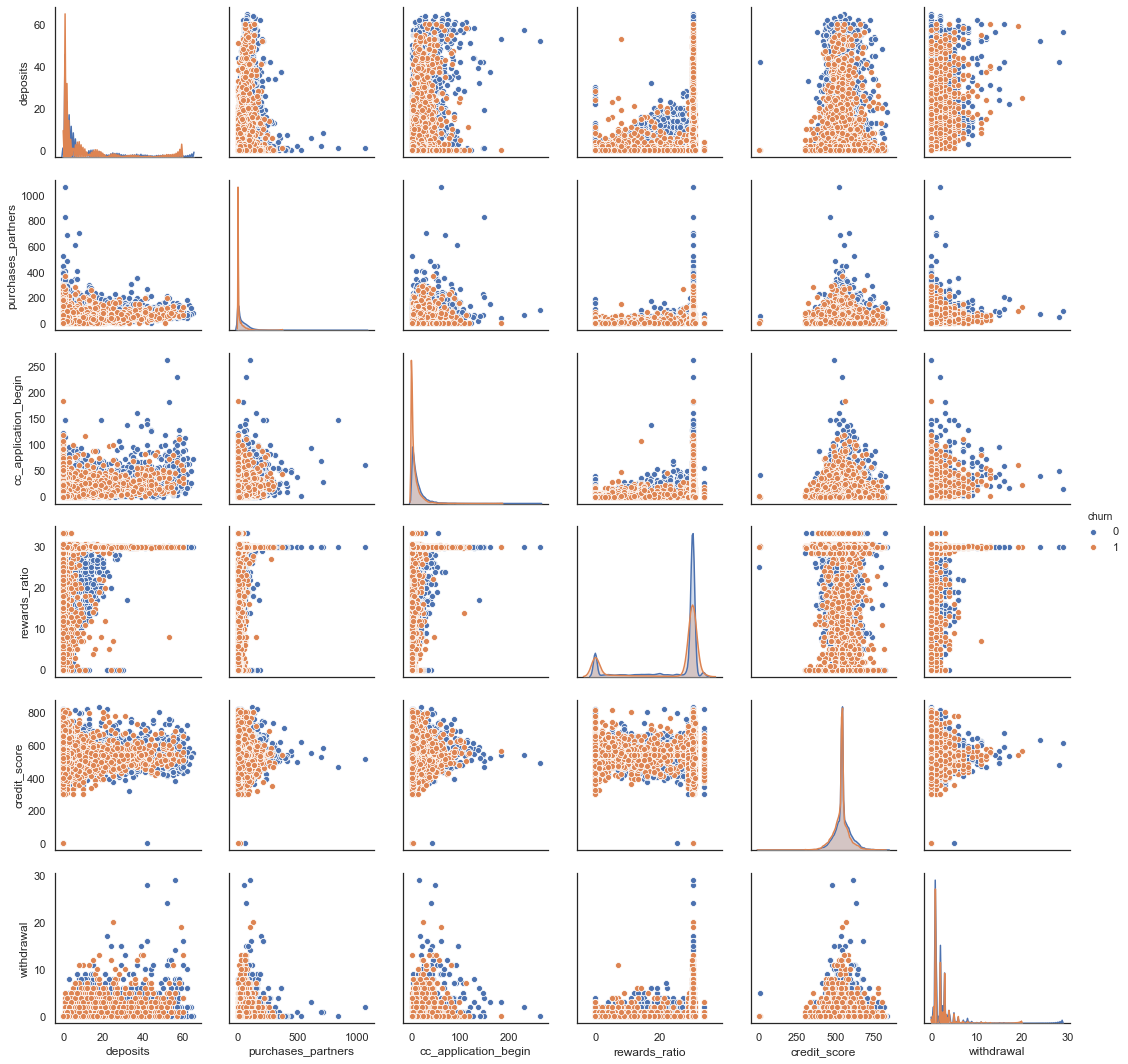

In [47]:
#create pairplot for target variable with the most highly correlated variables
sns.pairplot(churn_data, hue = 'churn', vars=(['deposits','purchases_partners','cc_application_begin',
                                               'rewards_ratio','credit_score','withdrawal']
            ))

In [48]:
#function for data visualization

def visualizeplot(df, col_to_exclude, tgt_col, object_mode = True):
    n = 0 
    feature_list = [] 
    if object_mode: 
        n_rows = 4 
        n_cols = 4 
        width = 20 
        height = 20 
    else: 
        n_rows =4 
        n_cols = 2 
        width = 20 
        height = 20 

    for column in df.columns: 
        if object_mode: 
            if (df[column].dtypes == 'O') & (column != col_to_exclude):
                feature_list.append(column) 
        else:
            if (df[column].dtypes != 'O') & (column != tgt_col):
                feature_list.append(column) 
    #produce plot based on attribu
    fig,ax=plt.subplots(n_rows,n_cols,sharex=False,sharey=False,figsize=(width,height))
    for row in range(n_rows):
        for col in range(n_cols):
            if object_mode:
                g=sns.countplot(df[feature_list[n]],ax=ax[row][col])
            else:
                g=sns.distplot(df[feature_list[n]],ax=ax[row][col])

            
            ax[row,col].set_title("{}".format(feature_list[n]))
            ax[row,col].set_xlabel("")
            ax[row,col].set_ylabel("")
            n+=1
    plt.show();
    return

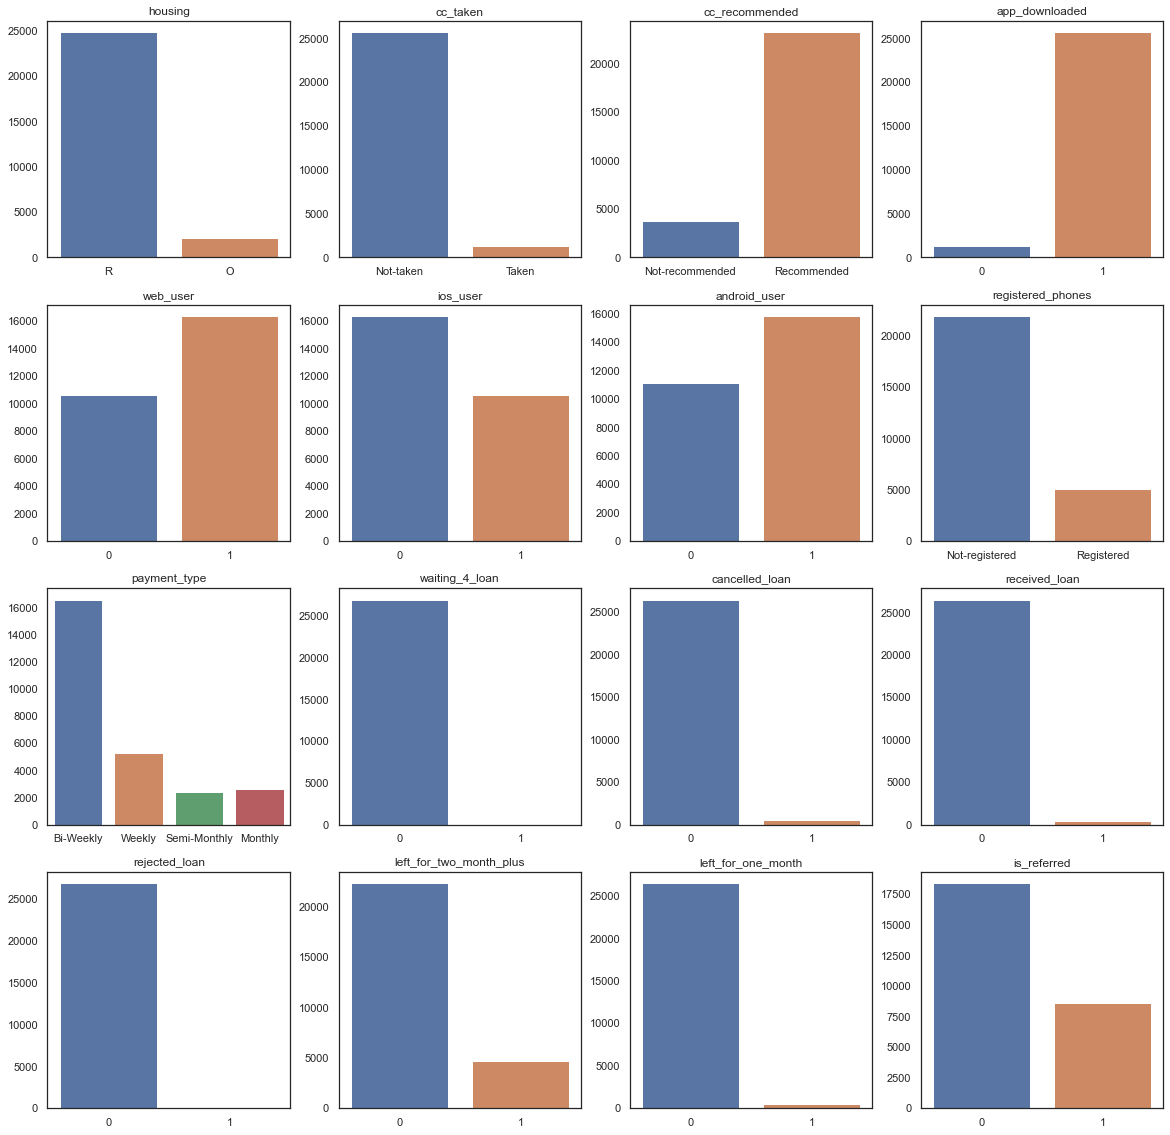

In [49]:
#Visualize Categorical Variables
visualizeplot(churn_data,'user','churn',object_mode=True)

As we can see, most of the bank's customers reside in rented houses and the credit cards taken by them are quite less. Well, the credit cards are recommended to them regularly by the bank. Looks like they are prominent users of online bank portals rather than physically visiting bank, we can see through their usage of mobile apps & web apps. They prefer to pay credit card bills Bi-weekly manner. Loans are being granted to them without much delay, although some customers aren't happy with the bank and they seem to be inactive for a some time.

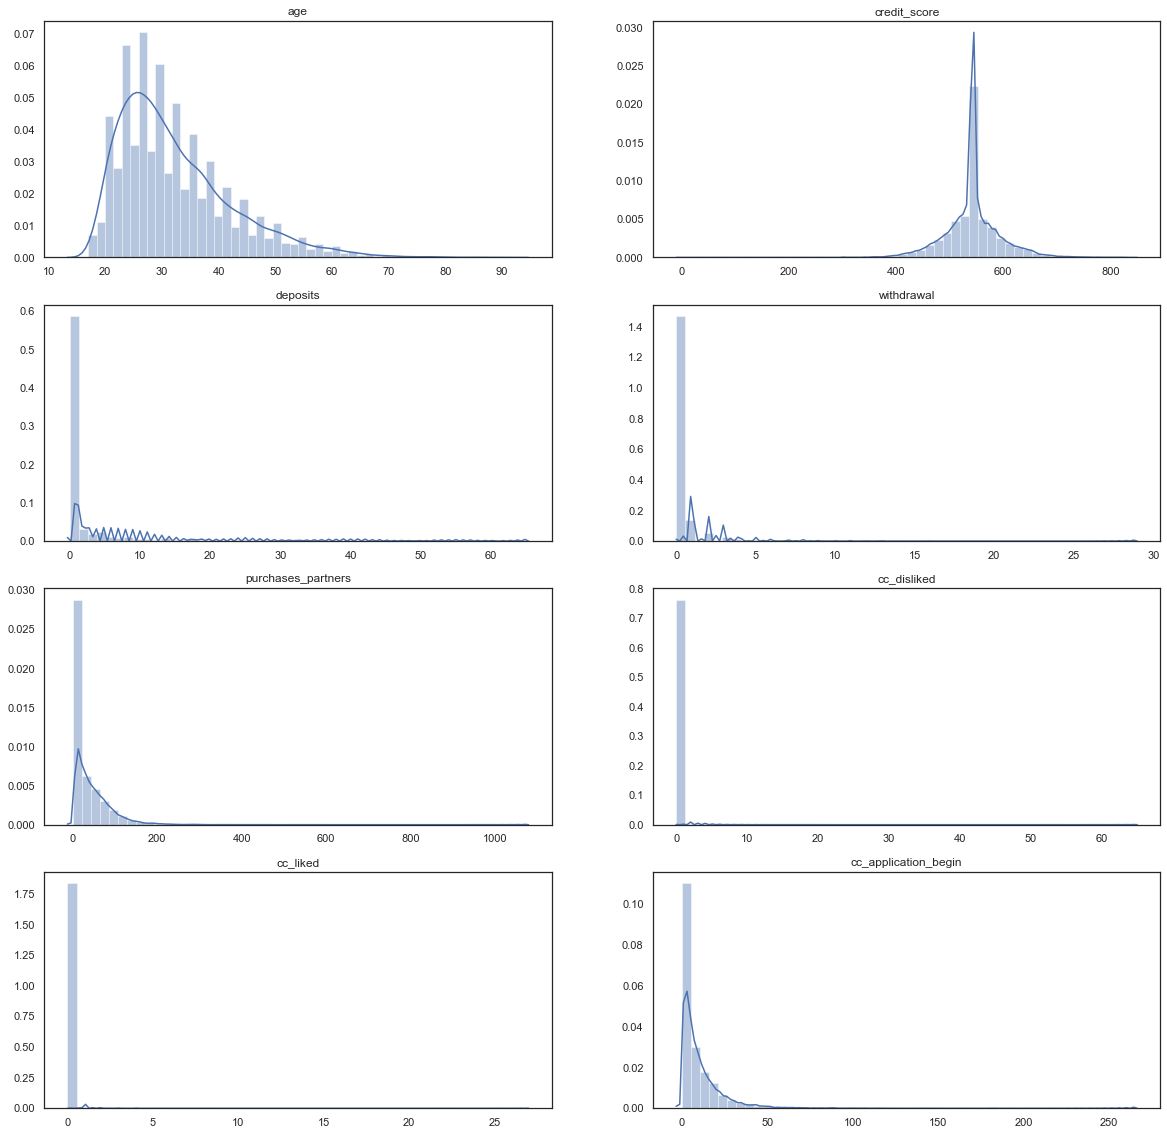

In [50]:
#visualize continuous variables
visualizeplot(churn_data,'user','churn',object_mode=False)

When it comes to continuous variables, features seem to be mostly skewed towards right . It means the features have mean greater than the median.

In [51]:
#function for bivariate analysis
def bi_variate(df,col1,col2):
    
    if col2=='churn':
        cross_name= pd.crosstab(df[col1],df[col2]).apply(lambda x: x/x.sum()*100,axis=1)
    else:
        cross_name= pd.crosstab(df[col1],df[col2]).apply(lambda x: x/x.sum()*100,axis=0)
    #print(cross_name)
    cross_name.plot.bar()
    plt.xlabel('{}'.format(col1))
    plt.ylabel('% of Churn Rate')
    plt.title('{} Vs Churn'.format(col1))
    plt.xticks(rotation=0)
    plt.figure(figsize=(16,12))
    plt.show()
    return cross_name

Here we run bivariate analysis on churn vs some categorical variables.

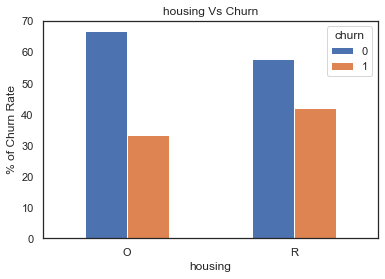

<Figure size 1152x864 with 0 Axes>

churn,0,1
housing,,
O,66.743436,33.256564
R,57.904064,42.095936


In [52]:
bi_variate(churn_data,'housing','churn')

We can infer that Rental housing customers have higher churn rate .

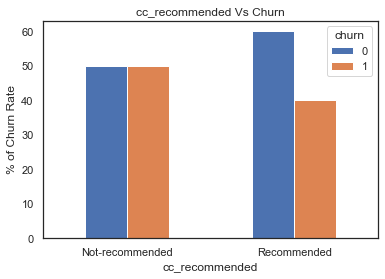

<Figure size 1152x864 with 0 Axes>

churn,0,1
cc_recommended,,
Not-recommended,49.986727,50.013273
Recommended,60.013774,39.986226


In [53]:
bi_variate(churn_data,'cc_recommended','churn')

Customers getting recommended credit cards and getting churned is about 40%. Thus, bank needs to work on different strategies while referring credit cards to it's customers.

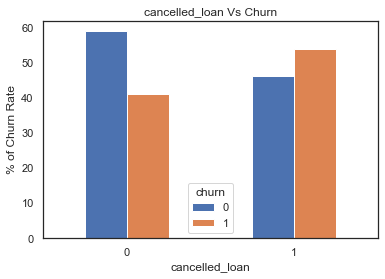

<Figure size 1152x864 with 0 Axes>

churn,0,1
cancelled_loan,,
0,58.855504,41.144496
1,46.062992,53.937008


In [54]:
bi_variate(churn_data,'cancelled_loan','churn')

We observe that customers whoose loan's getting cancelled are the most likely to churn.

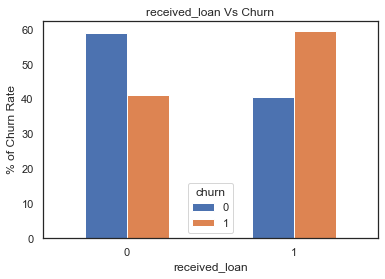

<Figure size 1152x864 with 0 Axes>

churn,0,1
received_loan,,
0,58.949791,41.050209
1,40.529532,59.470468


In [55]:
bi_variate(churn_data,'received_loan','churn')

This graph is fairly odd as it suggests that customers who are receiving their loans are also getting churned. This might be due to repayment of loans, high-interest rates charged by bank etc.

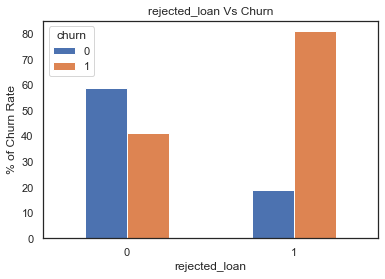

<Figure size 1152x864 with 0 Axes>

churn,0,1
rejected_loan,,
0,58.809736,41.190264
1,18.939394,81.060606


In [56]:
bi_variate(churn_data,'rejected_loan','churn')

We observe that rejection of loan in customers leads to maximum churn rates.

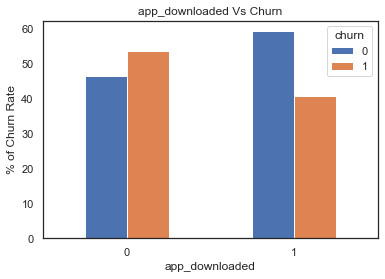

<Figure size 1152x864 with 0 Axes>

churn,0,1
app_downloaded,,
0,46.375682,53.624318
1,59.225415,40.774585


In [57]:
bi_variate(churn_data,'app_downloaded','churn')

Customers who are not using the bank apps are getting churned the most, since they may be not using the features.

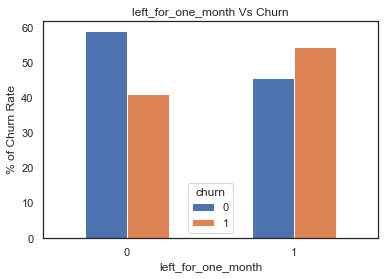

<Figure size 1152x864 with 0 Axes>

churn,0,1
left_for_one_month,,
0,58.856367,41.143633
1,45.491803,54.508197


In [58]:
bi_variate(churn_data,'left_for_one_month','churn')

Customers who have left_for_one_month the bank, tend to churn more because they are not satisfied with the bank's services.

# Feature Engineering

In [59]:
#dataframe input
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 55409 to 52752
Data columns (total 26 columns):
churn                      27000 non-null int64
age                        27000 non-null float64
housing                    27000 non-null object
credit_score               27000 non-null float64
deposits                   27000 non-null int64
withdrawal                 27000 non-null int64
purchases_partners         27000 non-null int64
cc_taken                   27000 non-null object
cc_recommended             27000 non-null object
cc_disliked                27000 non-null int64
cc_liked                   27000 non-null int64
cc_application_begin       27000 non-null int64
app_downloaded             27000 non-null object
web_user                   27000 non-null object
ios_user                   27000 non-null object
android_user               27000 non-null object
registered_phones          27000 non-null object
payment_type               27000 non-null object
waiting_4_

In [60]:
# One Hot Encoding
dataset = pd.get_dummies(churn_data)
dataset.columns

Index(['churn', 'age', 'credit_score', 'deposits', 'withdrawal',
       'purchases_partners', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'rewards_ratio', 'housing_O', 'housing_R', 'cc_taken_Not-taken',
       'cc_taken_Taken', 'cc_recommended_Not-recommended',
       'cc_recommended_Recommended', 'app_downloaded_0', 'app_downloaded_1',
       'web_user_0', 'web_user_1', 'ios_user_0', 'ios_user_1',
       'android_user_0', 'android_user_1', 'registered_phones_Not-registered',
       'registered_phones_Registered', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'waiting_4_loan_0', 'waiting_4_loan_1',
       'cancelled_loan_0', 'cancelled_loan_1', 'received_loan_0',
       'received_loan_1', 'rejected_loan_0', 'rejected_loan_1',
       'left_for_two_month_plus_0', 'left_for_two_month_plus_1',
       'left_for_one_month_0', 'left_for_one_month_1', 'is_referred_0',
       'is_referred_1'],
      dtype='objec

In [61]:
#Dummy Variables created but we should AVOID DUMMY VARIABLE TRAP which is the fact that the get_dummies function 
#creates one column for each level of the categorical variable, thus it creates correlations between 
#the newly created columns. To deal with that we must drop one column from each dummy variables categories.
#Now correlation from the one-hot encoded variables is removed
dataset = dataset.drop(columns = (['housing_R', 'cc_taken_Taken', 'cc_recommended_Recommended',
                                   'app_downloaded_1','web_user_1','ios_user_1','android_user_1',
                                   'registered_phones_Registered','payment_type_Weekly','waiting_4_loan_1',
                                   'cancelled_loan_1','received_loan_1','rejected_loan_1','left_for_two_month_plus_1',
                                   'left_for_one_month_1','is_referred_1'
                                  ]))

In [62]:
#change type, in order to be eable to exlude it from scaling
dataset['churn'] = dataset['churn'].astype(np.uint8)

In [63]:
#get only the continuous data, in order to scale them
continuous=dataset.loc[:, dataset.dtypes != np.uint8]

In [64]:
#data scaling
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
dataset[continuous.columns]=minmax.fit_transform(dataset[continuous.columns].values)

In [65]:
#scaled_data
dataset

,churn,age,credit_score,deposits,withdrawal,purchases_partners,cc_disliked,cc_liked,cc_application_begin,rewards_ratio,housing_O,cc_taken_Not-taken,cc_recommended_Not-recommended,app_downloaded_0,web_user_0,ios_user_0,android_user_0,registered_phones_Not-registered,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,waiting_4_loan_0,cancelled_loan_0,received_loan_0,rejected_loan_0,left_for_two_month_plus_0,left_for_one_month_0,is_referred_0
user,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55409,0,0.270270,0.647062,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0,1,1,0,0,0,1,1,1,0,0,1,1,1,1,0,1,1
23547,0,0.148649,0.578947,0.000000,0.000000,0.000937,0.0,0.0,0.019011,0.897959,0,1,0,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0
58313,0,0.243243,0.668660,0.723077,0.068966,0.080600,0.0,0.0,0.034221,0.898618,0,1,0,0,1,1,0,0,0,0,1,1,1,1,1,0,1,1
8095,0,0.121622,0.675837,0.400000,0.103448,0.035614,0.0,0.0,0.098859,0.900000,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,0
61353,1,0.135135,0.647062,0.000000,0.000000,0.001874,0.0,0.0,0.000000,1.000000,0,1,1,0,0,1,0,1,1,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24291,1,0.094595,0.691388,0.000000,0.000000,0.000000,0.0,0.0,0.007605,0.897196,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,0
4116,1,0.121622,0.647062,0.000000,0.000000,0.001874,0.0,0.0,0.000000,0.089552,0,1,0,0,0,1,0,1,1,0,0,1,1,1,0,0,1,1
23740,0,0.067568,0.647062,0.000000,0.000000,0.034677,0.0,0.0,0.000000,0.903226,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1


## Train-Test splitting

In [66]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

#### Balancing Dataset Procedure

In [67]:
#get indexes only according to response variable
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [68]:
#check which list is bigger
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

In [69]:
#choose randomly from list of positive indexes only len(lower) indexes - to get balance
import random
random.seed(0)
higher = np.random.choice(higher, size=len(lower))

In [70]:
lower = np.asarray(lower)

In [71]:
#concat indexes and create your balanced datasets
new_indexes = np.concatenate((lower, higher))
X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

In [72]:
X_train

,age,credit_score,deposits,withdrawal,purchases_partners,cc_disliked,cc_liked,cc_application_begin,rewards_ratio,housing_O,cc_taken_Not-taken,cc_recommended_Not-recommended,app_downloaded_0,web_user_0,ios_user_0,android_user_0,registered_phones_Not-registered,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,waiting_4_loan_0,cancelled_loan_0,received_loan_0,rejected_loan_0,left_for_two_month_plus_0,left_for_one_month_0,is_referred_0
user,,,,,,,,,,,,,,,,,,,,,,,,,,,
25691,0.121622,0.647062,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.857143,0,1,1,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1
51421,0.094595,0.602871,0.000000,0.000000,0.002812,0.0,0.0,0.011407,1.000000,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,1,1,1
16849,0.108108,0.641148,0.000000,0.000000,0.005623,0.0,0.0,0.026616,0.901840,0,1,0,0,0,1,0,1,0,0,0,1,1,1,1,0,1,1
30826,0.121622,0.612440,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0,1,0,0,1,0,1,1,0,0,0,1,1,1,1,1,1,1
7680,0.135135,0.611244,0.030769,0.000000,0.123711,0.0,0.0,0.057034,0.900000,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3880,0.054054,0.565789,0.015385,0.000000,0.059044,0.0,0.0,0.057034,0.902913,0,1,0,0,0,1,0,1,0,1,0,1,1,1,1,1,1,0
17920,0.256757,0.795455,0.261538,0.068966,0.130272,0.0,0.0,0.106464,0.900000,1,1,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,0
63782,0.216216,0.647062,0.000000,0.000000,0.008435,0.0,0.0,0.000000,0.120000,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1


In [73]:
# Import libraries
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [74]:
# Fitting Model to the Training Set
classifier = LogisticRegression(random_state = 0)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Regression Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression Accuracy: 0.658 (+/- 0.021)


In [75]:
# Fitting Model to the Training Set
classifier = svm.SVC()
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Support Vector Classifier Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Support Vector Classifier Accuracy: 0.655 (+/- 0.016)


In [76]:
# Fitting Model to the Training Set
classifier =  RandomForestClassifier()
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Random Forest Classifier Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.791 (+/- 0.020)


In [77]:
# Fitting Model to the Training Set
import lightgbm
classifier = lightgbm.LGBMClassifier()
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("LightGBM Classifier Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

LightGBM Classifier Accuracy: 0.733 (+/- 0.024)


In [78]:
# Applying Grid Search
import time
# Round 1: Entropy plus some values 
parameters = {"max_depth": [3, None], # here we put none in order to determine if numerical values is appropriate or none
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}

classifier =  RandomForestClassifier()

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 820.04 seconds


(0.7989031522862574,
 {'bootstrap': False,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 5})

In [79]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


In [80]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)

In [81]:
round(accuracy_score(y_test, y_pred),2)

0.69

In [82]:
round(precision_score(y_test, y_pred),2)

0.59

In [83]:
round(recall_score(y_test, y_pred),2)

0.79

In [84]:
round(f1_score(y_test, y_pred),2)

0.68

In [85]:
cm = confusion_matrix(y_test, y_pred)

Test Data Accuracy: 0.6870


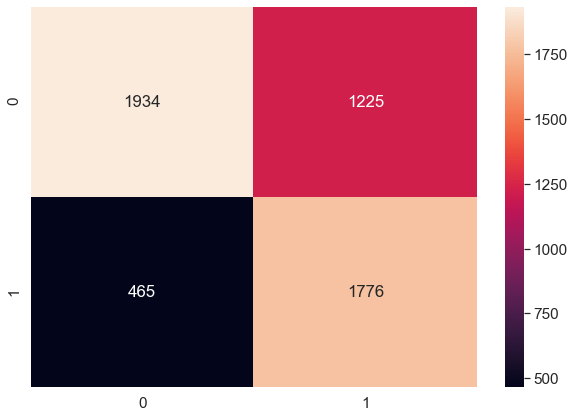

In [86]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))